<a href="https://colab.research.google.com/github/HaseebUlHassan437/classification-cats-vs-dogs-using-kesras../blob/main/cats_vs_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**dataset:**
[link text](https://www.kaggle.com/datasets/salader/dogs-vs-cats)

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [4]:
!kaggle datasets download salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout, Dropout

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [9]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding ='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), padding ='valid',strides=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3), padding ='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding ='valid', strides=(2,2)))

model.add(Conv2D(128,kernel_size = (3,3), padding ='valid', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding ='valid', strides=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))






/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history =model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.6136 - loss: 0.6636 - val_accuracy: 0.7584 - val_loss: 0.4983
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7561 - loss: 0.4921 - val_accuracy: 0.8014 - val_loss: 0.4438
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 67ms/step - accuracy: 0.8205 - loss: 0.3946 - val_accuracy: 0.7994 - val_loss: 0.4526
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.8788 - loss: 0.2808 - val_accuracy: 0.7746 - val_loss: 0.6025
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9314 - loss: 0.1709 - val_accuracy: 0.7764 - val_loss: 0.8760
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 75ms/step - accuracy: 0.9570 - loss: 0.1130 - val_accuracy: 0.7848 - val_loss: 0.9217
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9726 - loss: 0.0791 - val_accuracy: 0.7762 - val_loss: 0.9955
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9785 - loss: 0.0656 - 

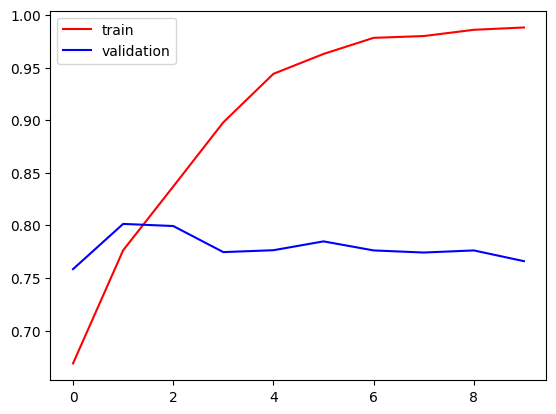

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

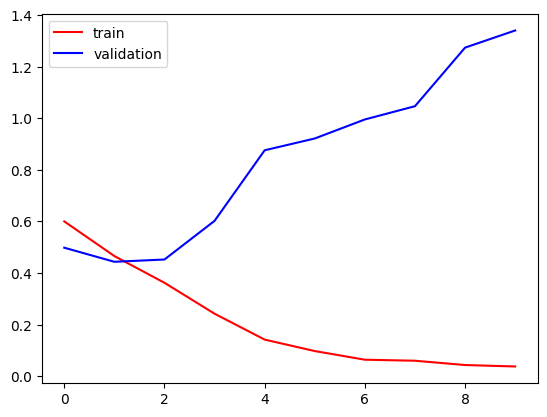

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **Ways to reduce Overfitting..**
##Data Augmentation
##L1/L2 Regularization
##Dropout
##Batch normalization
##Reduce Complexity of model

In [17]:
model2 = Sequential()
model2.add(Conv2D(32,kernel_size=(3,3), padding ='valid', activation='relu', input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), padding ='valid',strides=(2,2)))

model2.add(Conv2D(64,kernel_size=(3,3), padding ='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), padding ='valid', strides=(2,2)))

model2.add(Conv2D(128,kernel_size = (3,3), padding ='valid', activation ='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), padding ='valid', strides=(2,2)))

model2.add(Flatten())

model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1,activation='sigmoid'))






/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history2 =model2.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 87ms/step - accuracy: 0.5737 - loss: 2.5774 - val_accuracy: 0.6280 - val_loss: 0.6401
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7048 - loss: 0.5721 - val_accuracy: 0.7118 - val_loss: 0.5696
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7684 - loss: 0.4795 - val_accuracy: 0.6380 - val_loss: 0.6133
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8027 - loss: 0.4292 - val_accuracy: 0.7754 - val_loss: 0.4710
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8367 - loss: 0.3668 - val_accuracy: 0.6734 - val_loss: 0.6479
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8625 - loss: 0.3222 - val_accuracy: 0.8046 - val_loss: 0.5105
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.9056 - loss: 0.2383 - val_accuracy: 0.7696 - val_loss: 0.6750
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.9408 - loss: 0.1560 - 

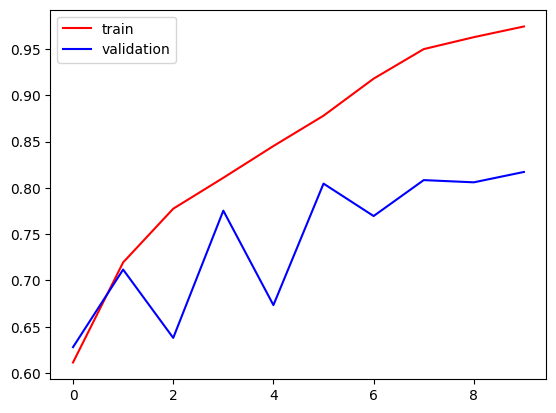

In [22]:
plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

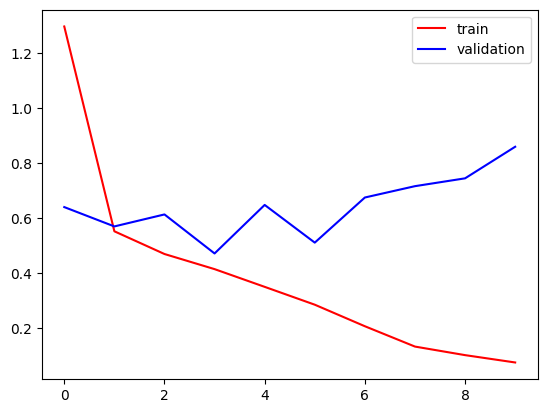

In [23]:
plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
import cv2

In [28]:
test_img = cv2.imread('/content/test/dogs/dog.10010.jpg')

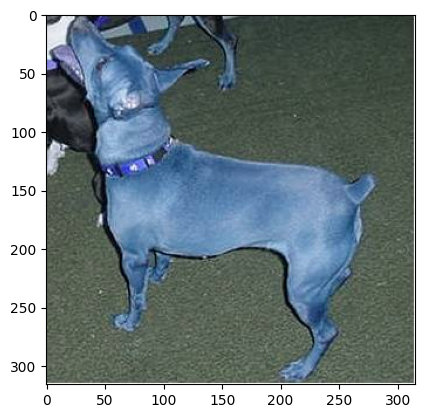

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(316, 315, 3)

In [32]:
test_img = cv2.resize(test_img,(256,256))

In [33]:
test_inp = test_img.reshape((1,256,256,3))


# **0 --> for Cats**
# 1 --> for **Dogs**

In [34]:
model2.predict(test_inp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.]], dtype=float32)